# Unintentional Equality Constraints in Contact Sets

Leading to multi-level deep null space polyhedrons

In [1]:
import numpy as np
import logging
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
)
from large_gcs.graph.graph import Vertex
from large_gcs.contact.contact_set import ContactSet
from pydrake.all import (VPolytope, AffineSubspace)


logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

In [2]:
from large_gcs.algorithms.search_algorithm import AlgMetrics
from large_gcs.domination_checkers.reaches_new_containment import ReachesNewContainment


graph_file = ContactGraphGeneratorParams.inc_graph_file_path_from_name(
    "cg_stackpush_d2"
)
cg = IncrementalContactGraph.load_from_file(
    graph_file,
    should_incl_simul_mode_switches=False,
    should_add_const_edge_cost=True,
    should_add_gcs=True,
    should_use_l1_norm_vertex_cost=True,
)
domination_checker = ReachesNewContainment(graph=cg, containment_condition=-1)
domination_checker.set_alg_metrics(AlgMetrics())

candidate_vertex_path = ['source', "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'IC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f2-obj1_f0', 'NC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'NC|obs0_f2-obj1_f0', 'NC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')"]


/Users/chewchiashaoyuan/Documents/Software/pypolycontain/pypolycontain/conversions.py:19: UserWarning: WARNING: You don't have CDD package installed. Unable to visualize polytopes. You may still visualize zonotopes.
  warnings.warn("WARNING: You don't have CDD package installed. Unable to visualize polytopes. You may still visualize zonotopes.")
/Users/chewchiashaoyuan/Documents/Software/pypolycontain/pypolycontain/containment.py:16: UserWarning: You don't have CDD package installed. Unable to run cone ray generation.
  warnings.warn("You don't have CDD package installed. Unable to run cone ray generation.")
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 9765.55it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 5038.20it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 10 body pairs...
100%|██████████| 10/10 [00:00<00:00, 41.23it/s]
INFO:large_gcs.graph.incremental_cont

In [3]:
vertex_name = candidate_vertex_path[1]
contact_set: ContactSet = cg.vertices[vertex_name].convex_set
sample = contact_set.get_samples(1)[0]

DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set


In [4]:
contact_set._polyhedron._nullspace_set.set.A() @ contact_set._polyhedron._nullspace_set.set.ChebyshevCenter() - contact_set._polyhedron._nullspace_set.set.b()

array([ -1.08253175,  -1.08253175,  -2.34729485,  -2.34729485,
        -1.08253175,  -1.08253175,  -1.25      ,  -1.25      ,
        -1.53093109,  -1.53093109,  -4.06186218,  -4.06186218,
        -3.24716314,  -3.24716314,  -1.53093109,  -1.53093109,
        -6.16746825,  -6.16746825,  -6.16746825,  -6.16746825,
        -8.70451654,  -4.00283686,  -4.29548346,  -4.99716314,
        -8.70451654,  -4.00283686,  -4.29548346,  -4.99716314,
        -6.17358545,  -1.08253175,  -6.82641455,  -7.91746825,
        -6.17358545,  -1.08253175,  -6.82641455,  -7.91746825,
        -3.64265436,  -1.08253175,  -9.35734564,  -7.91746825,
        -3.64265436,  -1.08253175,  -9.35734564,  -7.91746825,
       -11.25      ,  -8.25      ,  -1.25      ,  -1.25      ,
        -1.25      ,  -8.25      , -11.25      ,  -1.25      ])

In [5]:
contact_set._polyhedron.set.A() @ contact_set._polyhedron.set.ChebyshevCenter() - contact_set._polyhedron.set.b()

array([ -6.69628088,  -6.69628088,  -6.19655842,  -6.19655842,
        -5.69683597,  -5.69683597,  -2.5       ,  -2.5       ,
         0.        ,   0.        ,  -1.        ,  -1.        ,
        -8.5       ,  -8.5       ,   0.        ,   0.        ,
        -8.5       ,  -8.5       ,  -8.5       ,  -8.5       ,
       -13.        ,   0.        ,   0.        ,  -9.        ,
       -13.        ,   0.        ,   0.        ,  -9.        ,
       -12.        ,   0.        ,  -1.        ,  -9.        ,
       -12.        ,   0.        ,  -1.        ,  -9.        ,
       -11.        ,   0.        ,  -2.        ,  -9.        ,
       -11.        ,   0.        ,  -2.        ,  -9.        ,
         0.        ,  -9.5       , -12.5       ,   0.        ,
         0.        ,  -9.5       , -12.5       ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [6]:
contact_set._polyhedron._nullspace_set.set.ChebyshevCenter()

array([-4.29548346, -8.97723511,  3.18412788, -6.45504029, 11.4283296 ,
       18.42086318, 12.06885919, 12.10948688, -0.88388348, -1.53093109])

In [7]:
contact_set._polyhedron._nullspace_set.set.IsEmpty()

False

In [8]:
# contact_set._polyhedron.set.MaximumVolumeInscribedEllipsoid()

In [9]:
# Load these two paths into the graph
cg.add_vertex_path_to_graph(candidate_vertex_path)
# for i, v in enumerate(candidate_vertex_path):
#     logger.info(f"Generating neighbors for vertex {v}")
#     cg.generate_neighbors(v)

DEBUG:__main__:Checking 1
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


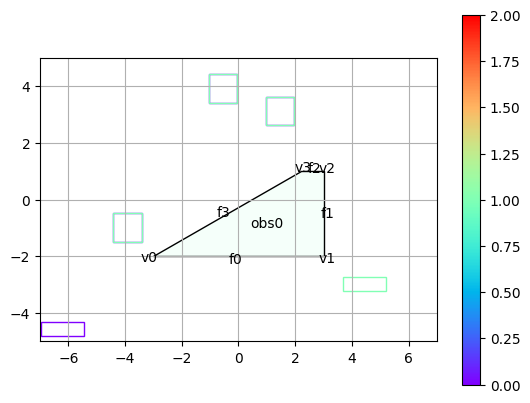

DEBUG:__main__:Checking 2
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


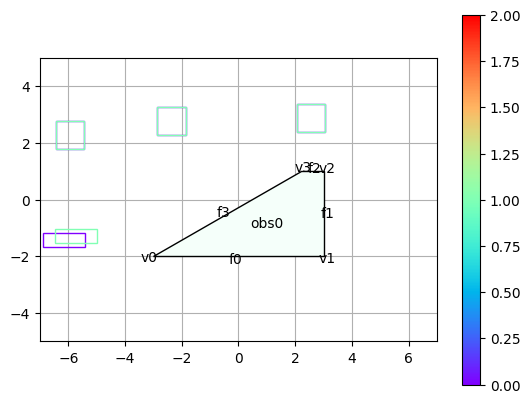

DEBUG:__main__:Checking 3
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


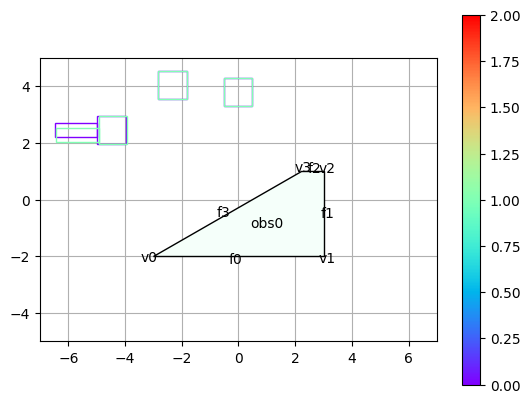

DEBUG:__main__:Checking 4
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


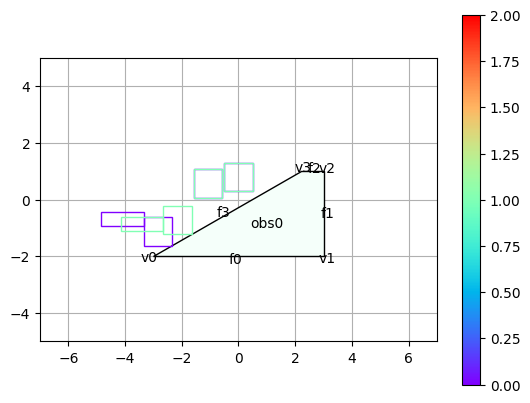

DEBUG:__main__:Checking 5
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


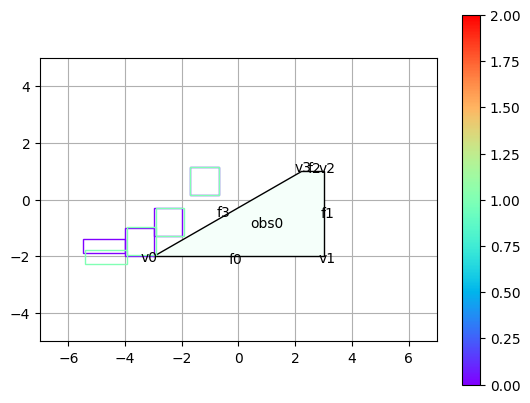

DEBUG:__main__:Checking 6
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


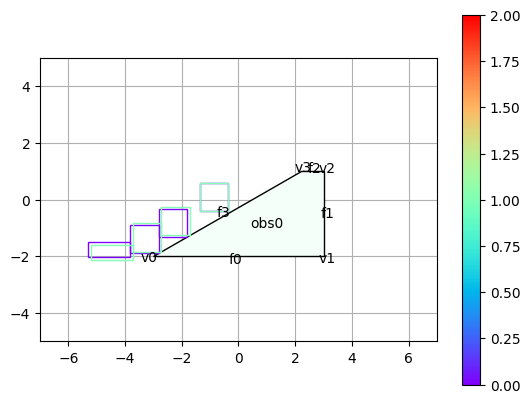

DEBUG:__main__:Checking 7
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


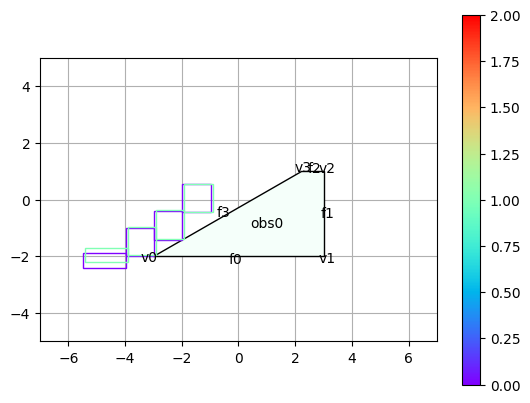

DEBUG:__main__:Checking 8
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'IC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


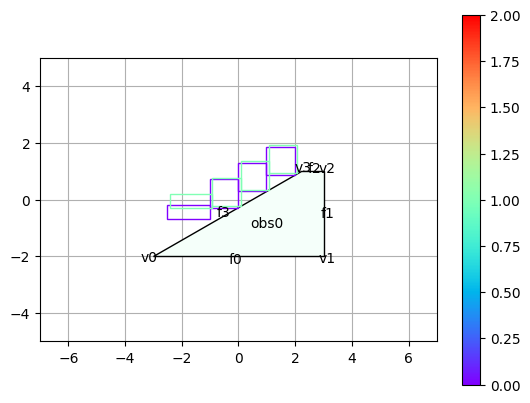

DEBUG:__main__:Checking 9
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


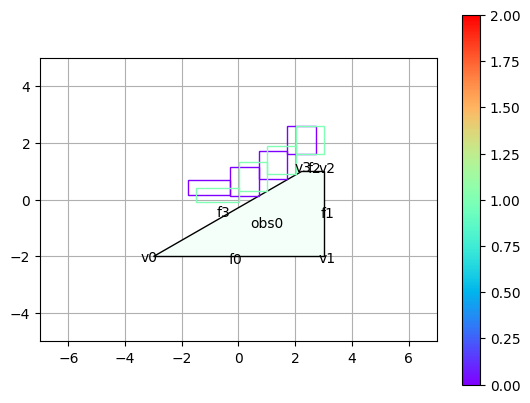

DEBUG:__main__:Checking 10
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('IC|obs0_f3-obj0_v1', 'NC|obs0_f2-obj1_f0', 'NC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


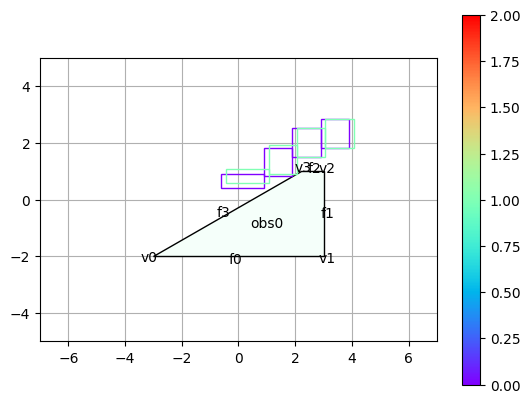

DEBUG:__main__:Checking 11
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('IC|obs0_f2-obj0_f0', 'NC|obs0_f2-obj1_f0', 'NC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


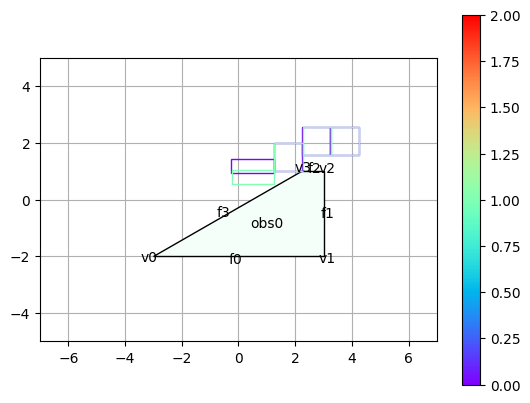

DEBUG:__main__:Checking 12
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


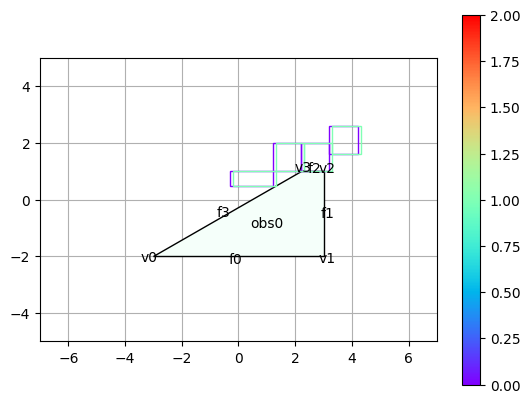

DEBUG:__main__:Checking 13
DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
DEBUG:__main__:('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')


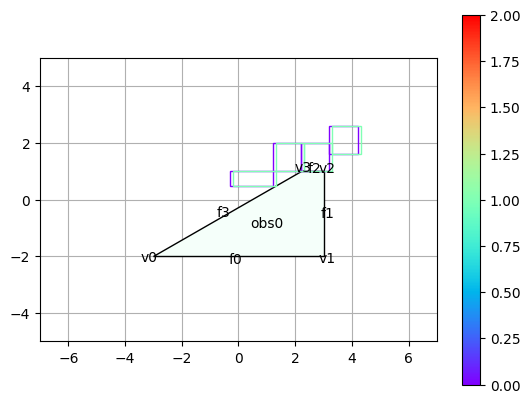

In [10]:
for i_set in range(1, len(candidate_vertex_path)):
    logger.debug(f"Checking {i_set}")
    v_name = candidate_vertex_path[i_set]
    try:   
        conv_set: ContactSet = cg.vertices[v_name].convex_set
        samples = conv_set.get_samples(1)
        logger.debug(f"{v_name}")
        cg.plot_samples_in_set(v_name, samples)
        # v_poly = VPolytope(conv_set._polyhedron._nullspace_set.set)
        # logger.debug(v_poly.vertices().shape)
    except Exception as e:
        logger.debug(f"Failed at {i_set}")
        logger.debug(e)

In [11]:
conv_set._polyhedron._nullspace_set.set.A() @ conv_set._polyhedron._nullspace_set.set.ChebyshevCenter() - conv_set._polyhedron._nullspace_set.set.b()

array([ -0.05365373,  -1.74634627,  -0.07967961,  -1.72032039,
        -1.05365373,  -0.74634627,  -1.07967961,  -0.72032039,
        -0.25365373,  -0.27967961,  -0.03981769,  -0.02681197,
        -0.05205176,  -0.07807764,  -0.10410352,  -1.89589648,
        -0.10410352,  -1.89589648,  -0.02602588,  -0.89589648,
        -0.89589648,  -4.74634627,  -8.25365373,  -4.72032039,
        -8.27967961,  -3.74634627,  -9.25365373,  -3.72032039,
        -9.27967961,  -2.74634627,  -2.10410352, -10.25365373,
        -6.89589648,  -2.72032039,  -2.10410352, -10.27967961,
        -6.89589648,  -5.74634627,  -6.75365373,  -5.72032039,
        -6.77967961])

In [12]:
conv_set._polyhedron._nullspace_set.set.A().shape

(41, 3)

In [13]:
p2 = conv_set._polyhedron._nullspace_set.set.ReduceInequalities(tol=0)
p2.A().shape

for i in range(10):
    p2 = p2.ReduceInequalities(tol=0)
    print(p2.A().shape)


(7, 3)
(7, 3)
(7, 3)
(7, 3)
(7, 3)
(7, 3)
(7, 3)
(7, 3)
(7, 3)
(7, 3)
